<a href="https://colab.research.google.com/github/moreymat/scpo-data-science-bootcamp/blob/main/3_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization

In this notebook, we will see how to build some data visualizations for our OpenFoodFacts dataset.

## Simple visualizations on OpenFoodFacts

First, we need to import pandas and load our OpenFoodFacts subset.

In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype

In [ ]:
# dataset
OFF_FILE = 'drive/MyDrive/data-science-bootcamp/off_products_subset.csv'
# data type of the columns, useful for loading
DTYPE_FILE = 'drive/MyDrive/data-science-bootcamp/dtype.txt'

In [ ]:
def load_off():
  """Load the filtered subset of OpenFoodFacts.
  
  Returns
  -------
  df : pd.DataFrame
    (A filtered subset of the) OpenFoodFacts tabular dataset.
  """
  # load the data types for the columns
  with open(DTYPE_FILE) as f:
    dtype = eval(f.read())

  # load the dataset
  df = pd.read_csv(OFF_FILE, sep='\t', dtype=dtype)
  # convert columns with datetimes
  for col_name in ('created_datetime', 'last_modified_datetime'):
    # ISO 8601 dates
    df[col_name] = pd.to_datetime(df[col_name])
  #
  return df

In [ ]:
df = load_off()

### Seaborn

[Seaborn](https://seaborn.pydata.org/) is a data visualization library for Python.
It provides a simpler, higher-level interface to the powerful but cumbersome library [matplotlib](https://matplotlib.org/), and enables to quickly build readable dataviz.

We need to import the seaborn library, whose conventional alias is `sns`.

In [ ]:
import seaborn as sns

## Nutri-Score

Nutri-Score grades are an ordered categorical variable, with 5 values ranging from A (healthy) to E (unhealthy).

These grades are based on an integer score, ranging from -15 (A) to +40 (E).
This score is computed as a sum of positive and negative points attributed based on nutritional values and ingredients, with separate scales for big categories of products.

In this section, we will build graphs to visualize Nutri-Score grades and scores.

To facilitate their reading, we will use the color palette of the Nutri-Score grades.

In [ ]:
# color palette of the Nutri-Score grades
colors_nutriscore = {
    'a': "#058244",
    'b': "#85BD39",
    'c': "#FDCD2A",
    'd': "#ED831E",
    'e': "#E53F1A",
}

### Visualizing categorical data : Nutri-Score grade

Seaborn enables to visualize categorical variables in a [variety of manners](https://seaborn.pydata.org/tutorial/categorical.html#plotting-with-categorical-data).

These visualizations can be built by calling the high-level function `catplot` and specifying, among other arguments, the type of categorical plot we want.

Let us try to answer the following vague question : "How healthy are the products sold in supermarkets ?".

This can translate to this more precise question : "How many products of each Nutri-Score grade does the dataset contain?".

We can answer the latter question by building a plot that represents, for each Nutri-Score grade, the total number of products in the dataset.
This corresponds in seaborn, and in the documentation page linked above, to a **count plot**.

Because a count plot is a special kind of categorical plot, we will call the high-level function [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) with the arguments describing that we want to build,
* a count plot : `kind='count'`,
* on our dataset : `data=df`,
* with one count bar for each Nutri-Score grade : `x=nutriscore_grade`,
* where each bar is colored following the Nutri-Score color palette : `palette=colors_nutriscore`.

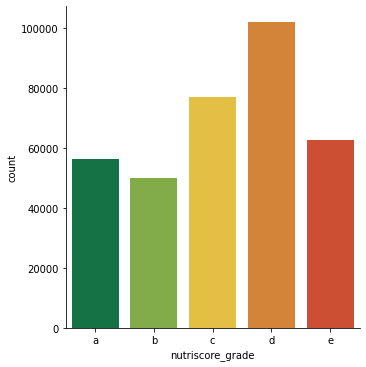

In [ ]:
sns.catplot(data=df, x='nutriscore_grade',
            kind='count', palette=colors_nutriscore)

This is the overall distribution of Nutri-Score grades on products across brands, but maybe some brands produce healthier products than others.

To quickly explore this hypothesis, let us look at the 9 most frequent brands in the dataset :

* count brands using the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method, with the result sorted in descending order,
* slice this result to keep the first 9.

In [ ]:
# select the 9 most frequent brands
# top_brands = ...
top_brands

Carrefour       9243
Auchan          7673
U               5222
Hacendado       3267
Casino          3153
Leader Price    3098
Delhaize        2334
Cora            2321
Picard          2003
Name: brands, dtype: Int64

To retrieve the names of these 9 brands, rather than their counts, we need to use the [keys](https://pandas.pydata.org/docs/reference/api/pandas.Series.keys.html) method.

In [ ]:
top_brands_names = top_brands.keys()
top_brands_names

Index(['Carrefour', 'Auchan', 'U', 'Hacendado', 'Casino', 'Leader Price',
       'Delhaize', 'Cora', 'Picard'],
      dtype='object')

Filter the products from these top 9 brands using [isin](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html) and store this subset in a new variable `df_top_brands`.

In [ ]:
# df_top_brands = ...
df_top_brands

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins_en,manufacturing_places,labels_en,emb_codes,emb_codes_tags,purchase_places,stores,countries_en,ingredients_text,allergens,traces_en,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category_en,image_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,vitamin-b1_100g,potassium_100g,calcium_100g,iron_100g,magnesium_100g,nutrition-score-fr_100g
1905,0020176240512,http://world-en.openfoodfacts.org/product/0020...,kiliweb,2018-01-03 12:01:36+00:00,2021-02-15 12:53:25+00:00,4 Vol Au Vent,<NA>,4 Stück,<NA>,Auchan,"Meals,Puff pastry meals,Vol-au-vent",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Auchan,"France,Germany","Farine de blé (gluten), margarine (matière gra...","en:gluten,en:milk",<NA>,<NA>,NaN,3,"en:e160a,en:e330,en:e471","E160a - Carotene,E330 - Citric acid,E471 - Mon...",0,<NA>,3,"huile-vegetale,e471-mono-et-diglycerides-d-aci...",22,e,4,Composite foods,One-dish meals,"To be completed,Nutrition facts completed,Ingr...",<NA>,<NA>,NaN,Vol-au-vent,https://images.openfoodfacts.org/images/produc...,2264.0,544.0,2264.0,35.80,19.8,NaN,NaN,NaN,NaN,45.600000,1.3,NaN,8.700000,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
7737,0051228638094,http://world-en.openfoodfacts.org/product/0051...,kiliweb,2018-08-29 18:00:09+00:00,2021-07-08 20:34:11+00:00,Crackers,<NA>,<NA>,<NA>,Leader Price,"Snacks,Salty snacks,Appetizers,Crackers",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Leader Price,France,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,14,d,NaN,Salty snacks,Appetizers,"To be completed,Nutrition facts completed,Ingr...",<NA>,62,b,Crackers,https://images.openfoodfacts.org/images/produc...,NaN,424.0,1774.0,10.94,1.5,NaN,NaN,NaN,NaN,75.120000,2.0,NaN,7.050000,2.00,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
10228,0066844370082,http://world-en.openfoodfacts.org/product/0066...,kiliweb,2017-11-12 12:01:36+00:00,2021-01-22 21:43:39+00:00,Pois cassés verts,<NA>,500g,<NA>,Leader Price,"Plant-based foods and beverages,Plant-based fo...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Leader Price,France,POIS CASSES VERTS Qualité Supérieure,<NA>,<NA>,<NA>,NaN,0,<NA>,<NA>,0,<NA>,0,<NA>,-5,a,NaN,Cereals and potatoes,Legumes,"To be completed,Nutrition facts completed,Ingr...",<NA>,75,b,Dried split peas,https://images.openfoodfacts.org/images/produc...,NaN,352.0,1473.0,1.20,0.2,NaN,NaN,NaN,NaN,61.700000,8.0,25.5,23.800000,0.04,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
10229,0066844370099,http://world-en.openfoodfacts.org/product/0066...,kiliweb,2020-03-16 23:21:54+00:00,2021-02-12 00:17:58+00:00,Haricots Coco,<NA>,500 g,"Sachet,Plastique",Leader Price,"Plant-based foods and beverages,Plant-based fo...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Leader Price,France,HARICOTS cOCO,<NA>,<NA>,<NA>,NaN,0,<NA>,<NA>,0,<NA>,0,<NA>,-6,a,1,Cereals and potatoes,Legumes,"To be completed,Nutrition facts completed,Ingr...",<NA>,<NA>,NaN,Common beans,https://images.openfoodfacts.org/images/produc...,NaN,337.0,1410.0,1.20,0.2,NaN,NaN,NaN,NaN,60.799999,3.9,15.3,22.299999,0.01,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0
10231,0066844370617,http://world-en.openfoodfacts.org/product/0066...,kiliweb,2018-03-22 13:15:18+00:00,2021-08-09 08:56:26+00:00,Lentille Vertes Qualité Supérieure,<NA>,<NA>,<NA>,Leader Price,"Plant-based foods and beverages,Plant-based fo...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Leader Price,France,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,

You should get 38314 entries.

Now, we want to plot the distribution of Nutri-Score grades separately for each of these top brands.

This will be very similar to the previous graph, except we will make use of catplot's ability to display [multiple facets](https://seaborn.pydata.org/tutorial/categorical.html#showing-multiple-relationships-with-facets).

Changes are :

* we only want to plot products from the top brands (`data=df_top_brands`),
* we want to build a distinct plot for each brand (`col=brands`),
* and display 3 plots in a row, so it fits our screen (`col_wrap=3`).

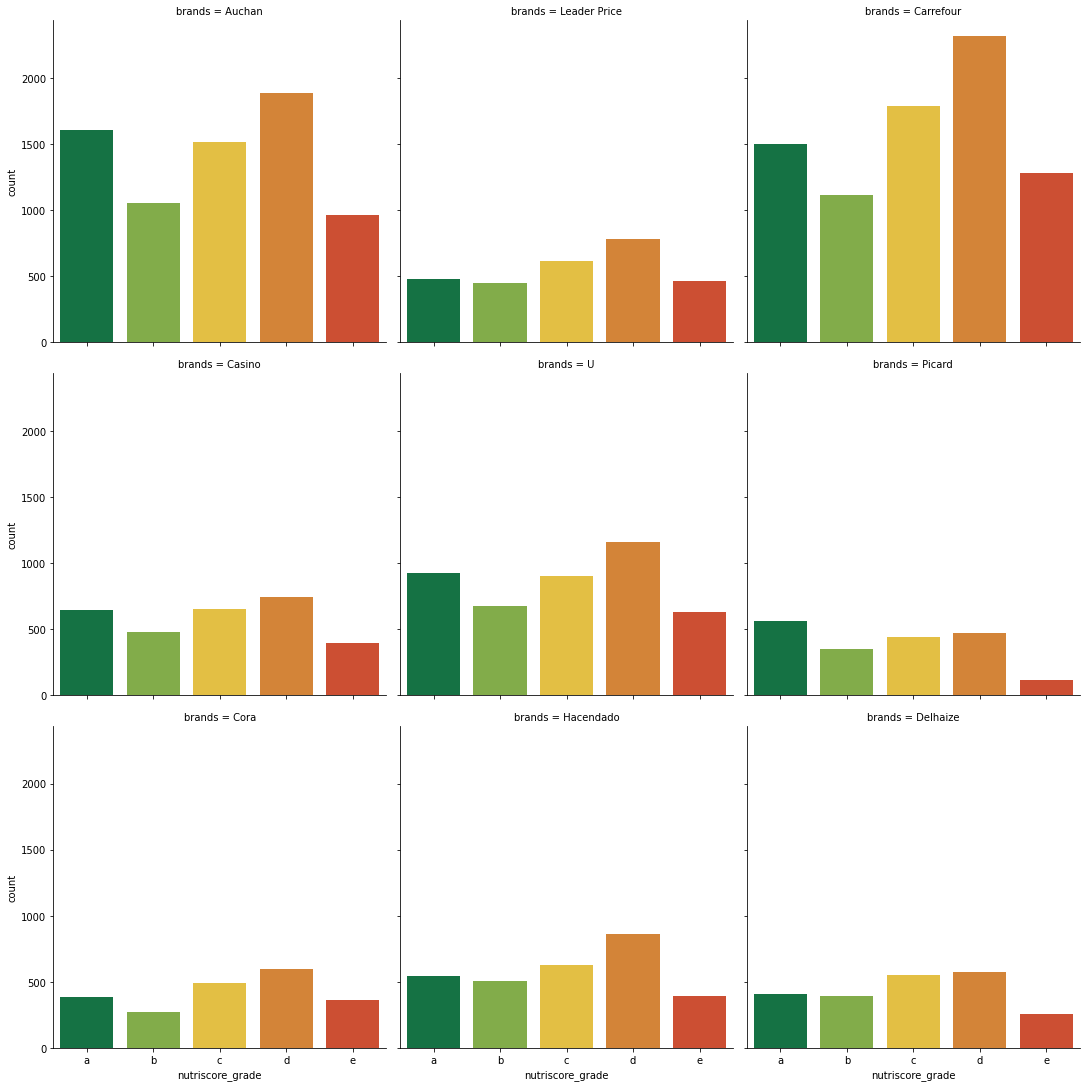

In [ ]:
sns.catplot(data=df_top_brands, x='nutriscore_grade',
            kind='count', palette=colors_nutriscore,
            col='brands', col_wrap=3)

The distribution among Nutri-Score categories seems quite similar across brands, but does this hold true on the underlying Nutri-Score *scores* ?

### Visualizing numerical data : Nutri-Score score

Nutri-Score scores range from -15 to 40 :

* A : -15 to -1
* B : 0 to 2
* C : 3 to 10
* D : 11 to 18
* E : 19 to 40

Visualizing the Nutri-Score scores, rather than the Nutri-Score grades, should provide a more accurate, finer-grained view of the healthiness of products according to the Nutri-Score methodology.

Because Nutri-Score scores correspond to a [quantitative variable](https://en.wikipedia.org/wiki/Quantification_(science)), we can plot the distribution of their values using [displot](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms).

By default, `displot` builds a histogram (`kind='hist'`).
Because we know we only have integer values, we can additionally specify we want the bins of the histogram to correspond to [discrete values](https://en.wikipedia.org/wiki/Continuous_or_discrete_variable#Discrete_variable) (`discrete=True`). Otherwise, the bin sizes estimated by seaborn result in gaps that hinder readibility. 

First, let us build the distribution graph for the entire dataset.

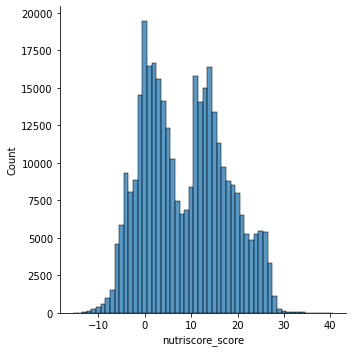

In [ ]:
sns.displot(data=df, x='nutriscore_score', discrete=True)

This graph looks almost good, but too tight because it tries to fit many bars in a limited width.
We can modify the size of the figure of the displot by using parameters `height` (in inches) and `aspect`, where the figure width will be `height * aspect` (inches).
The default values are [`height=5` and `aspect=1`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), so we will increase the `aspect`.

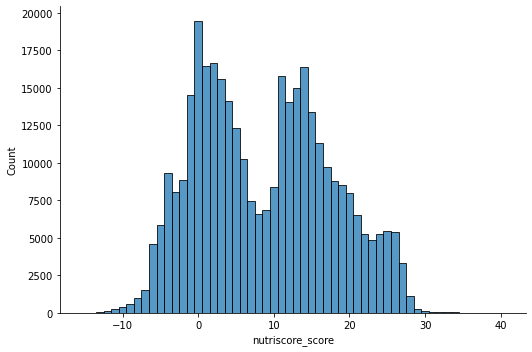

In [ ]:
sns.displot(data=df, x='nutriscore_score', discrete=True,
            height=5, aspect=1.5)

The readability of the graphd is increased, as expected.

Then let us produce the same type of distribution graph, but for each of the top brands we selected earlier.
Remember to change the data and add the extra arguments that tell seaborn what distinct plots it should build and what their layout should be.

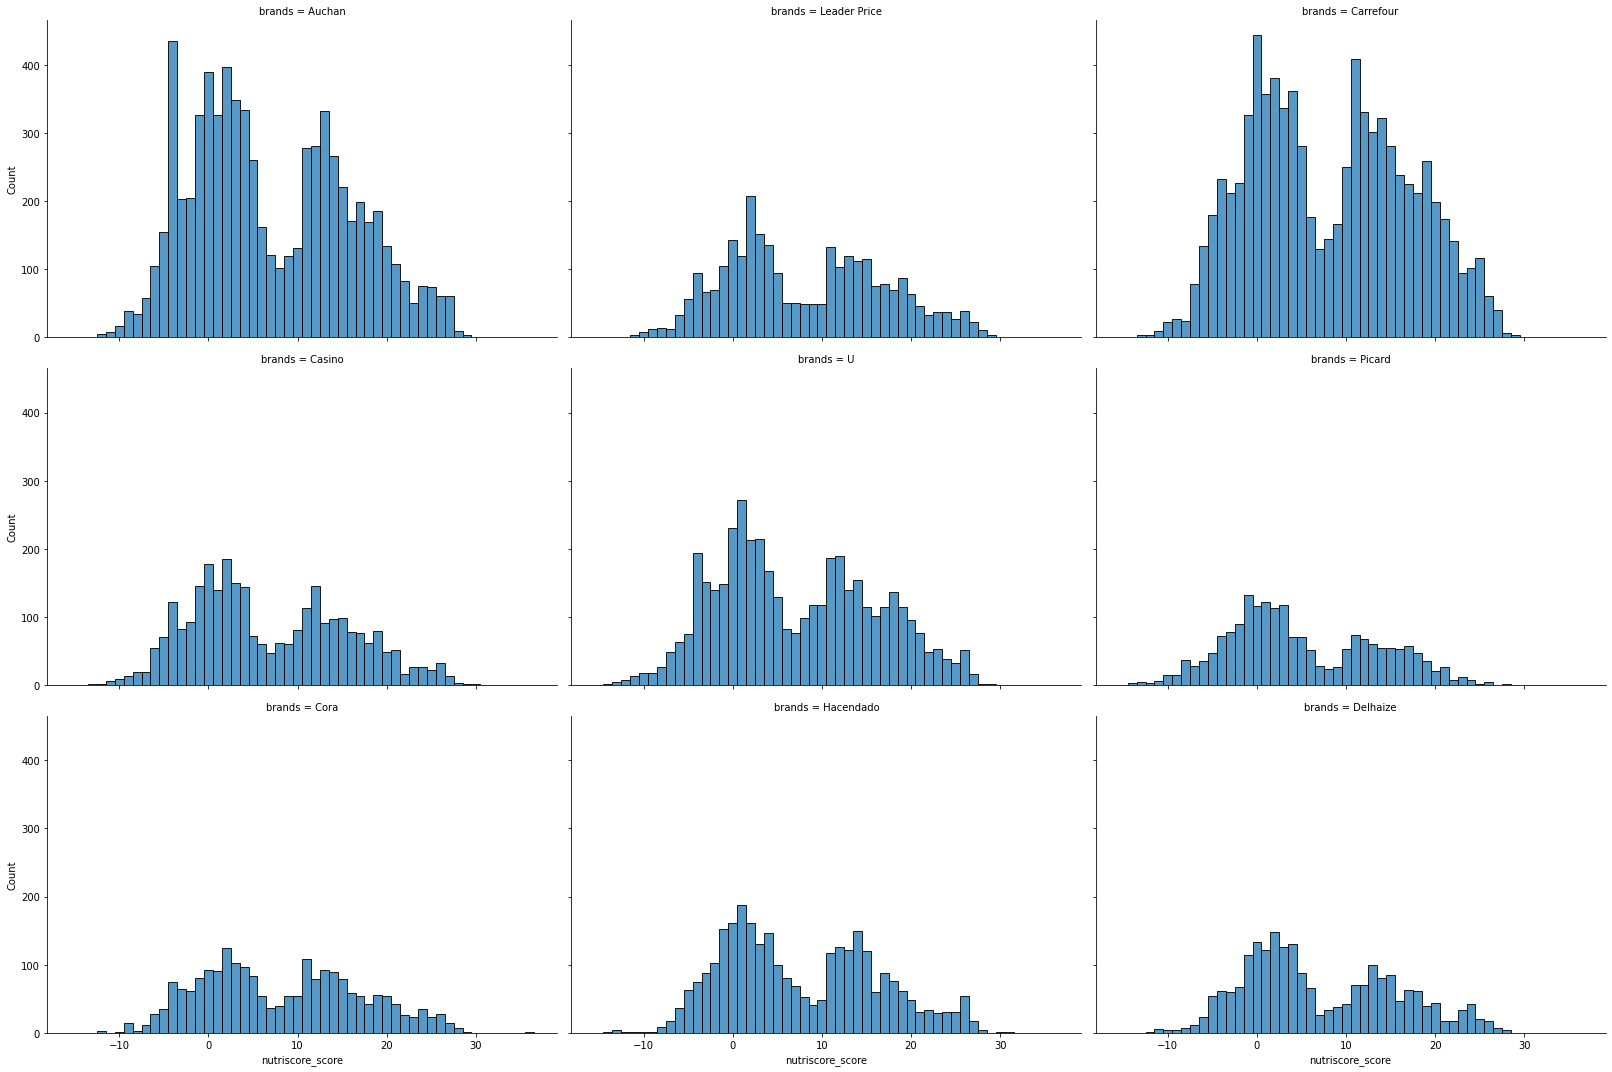

In [ ]:
sns.displot(data=df_top_brands, x='nutriscore_score', discrete=True,
            kind='hist',
            col='brands', col_wrap=3,
            height=5, aspect=1.5)

### Visualizing numerical and categorical data : Nutri-Score score and grade

This is all nice but the Nutri-Score score graphs could be more readable if the bars had the nice colors from the Nutri-Score grade graphs.
As each Nutri-Score score maps to a Nutri-Score grade, this should be straightforward.
`displot` has an argument `hue` that can take a column name (here `'nutriscore_grade'`), and the same `palette` argument as `catplot`.

Let us build the distribution plot of Nutri-Score scores, with the colors of the Nutri-Score grades, for the whole dataset.

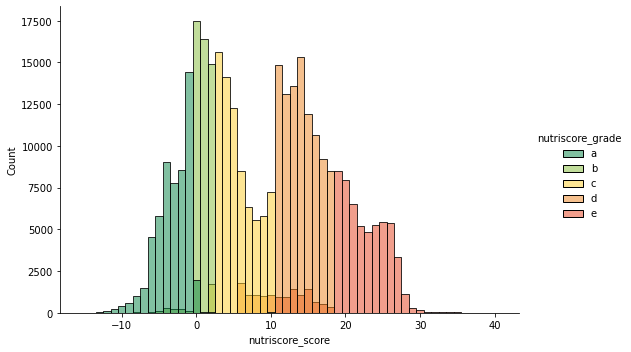

In [ ]:
sns.displot(data=df, x='nutriscore_score', discrete=True,
            hue='nutriscore_grade',
            kind='hist', palette=colors_nutriscore,
            height=5, aspect=1.5)

You should notice something weird at the bottom of many bars: It seems as if another, more opaque, bar is superposed.

This is because, contrarily to our assumption, some products have a Nutri-Score score that does not map to the expected Nutri-Score grade.
How can this be ?

While the Nutri-Score grade is displayed on the product, the Nutri-Score score is not.
Therefore, OpenFoodFacts re-estimates the Nutri-Score score from the nutritional values and relevant (estimated) proportion of certain ingredients.
Certain information is hard to retrieve though, like the proportion of fruits, vegetables and nuts in a product, or not always displayed like its fiber content.
As a consequence, the Nutri-Score score in OpenFoodFacts is a best estimate, based on the available information, from the true Nutri-Score score.
The information gap between the available information and all the true values required to compute the Nutri-Score score, explains the discrepancy between the true Nutri-Score grade and its expected value based on the (partial) Nutri-Score score.

Now that we know this, we can modify our distribution plot of Nutri-Score scores with colors for grades, so that bars for different Nutri-Score grades are properly stacked rather than (confusingly) laid over one another.

This is done with the parameter `multiple='stacked'` (the default value for a [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) is `multiple='layer'`).

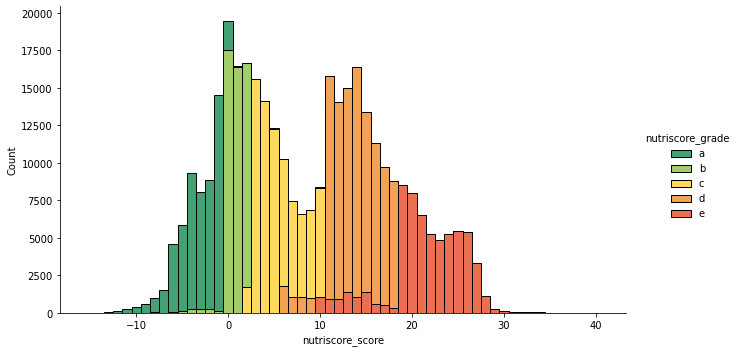

In [ ]:
sns.displot(data=df, x='nutriscore_score', discrete=True,
            hue='nutriscore_grade',
            kind='hist', multiple='stack', palette=colors_nutriscore,
            height=5, aspect=1.8)

The impact of missing information is obvious here : Some products graded 'e' have estimated Nutri-Scores as low as 10.

Build the same graph for each of the top brands.

### Nutri-Score vs Nova

The Nutri-Score and Nova groups capture different aspects of the impact of food products on health.
Are they correlated ?

In [ ]:
# we will use the color palette for the NOVA groups
# couleurs NOVA
colors_nova = {
    '1': '#00aa00',
    '2': '#ffcc00',
    '3': '#ff6600',
    '4': '#ff0000',
}

We will first plot, for each Nutri-Score grade, the count of products with this Nutri-Score grade and each of the NOVA groups.

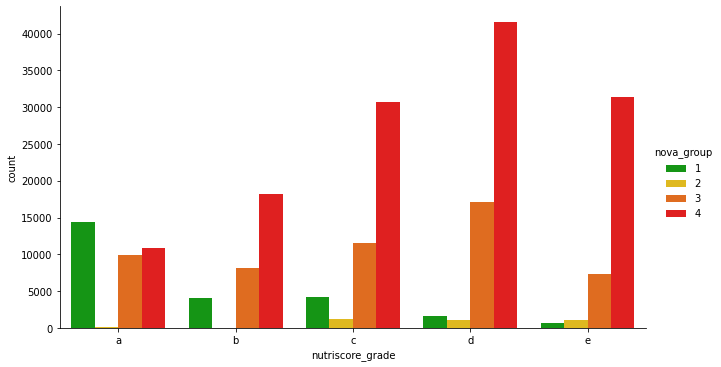

In [ ]:
sns.catplot(data=df, x='nutriscore_grade',
            hue='nova_group',
            kind='count', palette=colors_nova,
            height=5, aspect=1.8)

The NOVA group 4 is dominant in all Nutri-Score grades except the healthiest one (group 'a').
This is consistent with the fact that, by construction, the Nutri-Score and NOVA groups capture different aspects.

Now do the plot the other way round : for each NOVA group, plot the number of products with this NOVA group and each of the Nutri-Score grades. Do not forget to use the right color palette.

A majority of the products in the NOVA group 1 have the Nutri-Score grade 'a'.
Most raw products (NOVA group 'a') are also nutritionally healthy.

NOVA group 2 contains very few products, mostly from Nutri-Score grades 'c' and below.

The [mode](https://en.wikipedia.org/wiki/Mode_(statistics) of NOVA groups 3 and 4 respectively are Nutri-Score grades 'd' and 'e', but both NOVA groups contain a non-negligible number of products with Nutri-Score 'a'.


Let us see if the same is true for Nutri-Score scores versus NOVA groups.

Hint : use the same `displot` function as earlier but replace arguments specific to Nutri-Score grades with their equivalent for NOVA groups.

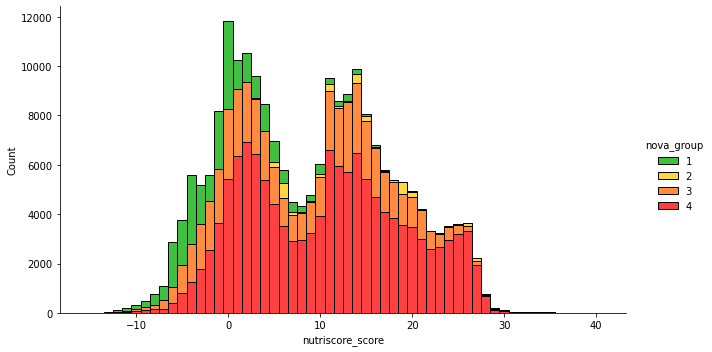

In [50]:
sns.displot(data=df, x='nutriscore_score', discrete=True,
            hue='nova_group',
            kind='hist', multiple='stack', palette=colors_nova,
            height=5, aspect=1.8)

**Bonus exercise.** Try and come up with a graph built the other way round, ie. a catplot of NOVA groups that displays distributions of Nutri-Score scores.

### Eco-Score

In January 2021, OpenFoodFacts and a number of actors launched the [Eco-Score (French)](https://docs.score-environnemental.com/):
  * [announcement (French)](https://fr.blog.openfoodfacts.org/news/lancement-de-l-eco-score-la-note-environnementale-des-produits-alimentaires)
  * [description (French)](https://fr.openfoodfacts.org/eco-score-l-impact-environnemental-des-produits-alimentaires)

Build for the Eco-Score (score and grade) the same graphs as the ones we produced for the Nutri-Score.

0         d
8         b
12        e
13        e
14        e
         ..
416544    b
416545    d
416546    b
416549    e
416550    c
Name: ecoscore_grade_fr, Length: 267772, dtype: category
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

We can also compare Nutri-Score scores and Eco-Score scores, with a [scatter plot](https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots).

Scatter plots enable to visualize the joint distribution of two variables, using a cloud of points where each variable is a coordinate in the 2 dimensional plane.

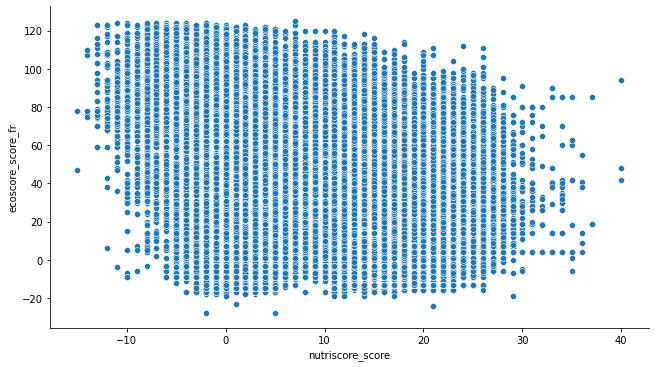

In [53]:
sns.relplot(data=df, x='nutriscore_score', y='ecoscore_score_fr',
            kind='scatter',
            height=5, aspect=1.8)

It seems as if the Nutri-Score score and Eco-Score score are quite independent.

We have little hope but let us add the Nutri-Score grade as hue, with its color palette, and see if this helps us see any regularity.

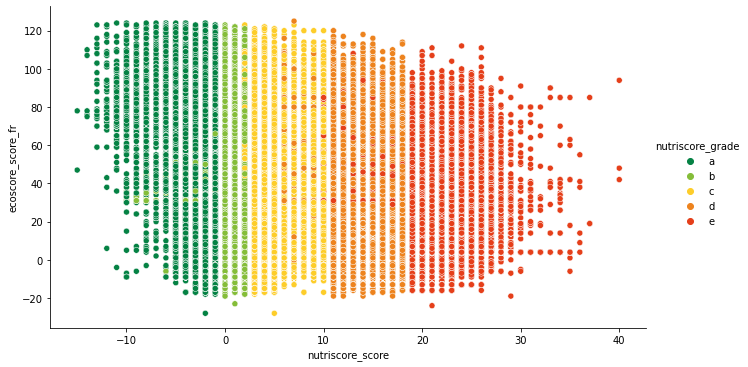

In [55]:
sns.relplot(data=df, x='nutriscore_score', y='ecoscore_score_fr',
            kind='scatter', hue='nutriscore_grade', palette=colors_nutriscore,
            height=5, aspect=1.8)

No luck here.

However, scatter plots and [line plots](https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots) are very useful tools that you can put to better use to look at eg. pairs of nutritional values, or a nutritional value and Nutri-Score.

## Project

You now have the basics to conduct an analysis of the products in OpenFoodFacts on your own.

This is fortunate, because (if time permits) you are tasked with conducting an analysis of a product category or categories of your choice.
Your goal here should be to provide a global view of the dataset, and exhibit salient features that could inform a decision or be of interest to an analyst or stakeholder in the sector concerned by your product category or categories.

You first need to find a question or set of questions you really want to answer, for example :

* What would be the impact of a fat tax similar to [the former Danish fat tax](https://en.wikipedia.org/wiki/Fat_tax#Denmark) ("a fat tax on butter, milk, cheese, pizza, meat, oil and processed food if the item contains more than 2.3% saturated fat.") ?
* What proportion of products in each category would be impacted ?

The same line of questions could be pursued with other taxes like the [Sugary drink taxes](https://en.wikipedia.org/wiki/Sugary_drink_tax), [Pasty tax](https://en.wikipedia.org/wiki/Pasty_tax) etc.

Another possible direction of investigation would be to examine the spread of certain labels in product families, such as the various ecolabels.

A third direction would be to examine the spread of certain additives in order to evaluate the potential impact of a change in legislation banning some additives.

You will need to :
* define your subset of (rows or columns) of interest,
* determine which dataviz (graphs) would support your investigation (eg. characteristics of certain product groups, or similarities and differences between the distribution of some nutritional values between for instance salty and sweet snacks).
* build these dataviz.
* interpret these dataviz and comment on each, in order to help answering your questions and making your case.

### Bonus for the machine-learning enthusiasts

If you already have some experience in machine learning, for example using [scikit-learn](https://scikit-learn.org/stable/), you can also build a set of prediction models that are able to:
  * predict the `nutriscore_grade` of a product given nutritional values and possibly other fields (as few as possible),
  * predict the `nova_group` of a product given nutritional values and possibly other fields (as few as possible),
  * predict the `pnns_groups_1` of a product given nutritional values and possibly other fields (as few as possible),
  * predict the `pnns_groups_2` of a product given nutritional values and possibly other fields (as few as possible),
  * predict the `categories` (either atomic categories or lists of categories) of a product given nutritional values and possibly other fields (as few as possible),
  * predict one or more nutritional values (ex: `sugars_100g`) given nutritional values and possibly other fields (as few as possible).

### For the adventurous

OpenFoodFacts has a sister project : [OpenBeautyFacts](https://fr-en.openbeautyfacts.org/), a database on cosmetic products, broadly speaking : from hand dishwashing products to creams, shampoos, deodorants, toothpaste...

OpenBeautyFacts is smaller in size and less mature, but you can try and play with their [data exports](https://fr-en.openbeautyfacts.org/data).

But you can also just contribute to OpenFoodFacts or OpenBeautyFacts, via their website, dedicated apps, or third-party apps !